https://github.com/siddharthKatageri/toy-gda/blob/master/gda.py \
https://github.com/PandeySudeep/GDA

## Implementation of GDA on Gaussian Distributed Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import pylab as pl
from numpy.random import uniform, seed
from matplotlib import cm
from scipy.interpolate import griddata
from numpy import *

from utils import LinearModel

### Data from CS229n Assignment

In [2]:
ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'

In [16]:
def normalize(fd_list):
    mean = np.mean(fd_list, axis=0)
    sd = np.std(fd_list, axis=0)

    normal_fd = (fd_list - mean)/sd
    return normal_fd

def seperate_data(x, y):
    positive = []
    negative = []
    for i,val in enumerate(y):
        if(val== 1):
            positive.append(x[i])
        else:
            negative.append(x[i])
    return np.array(positive), np.array(negative)


In [17]:
x_train, y_train = utils.load_dataset(ds2_training_set_path)
x_valid, y_valid = utils.load_dataset(ds2_valid_set_path)

print(x_train.shape)
print(y_train.shape)
print("Numer of Features ", x_train.shape[1])
print("Number of classes", np.unique(y_train))
print("Number of Positive and Negative samples", np.unique(y_train, return_counts = True))

(800, 2)
(800,)
Numer of Features  2
Number of classes [0. 1.]
Number of Positive and Negative samples (array([0., 1.]), array([400, 400], dtype=int64))


In [15]:
x_p

array([], dtype=float64)

Text(0, 0.5, 'Feature 2')

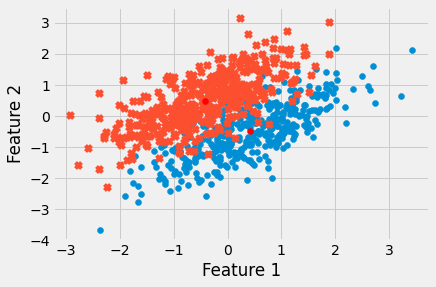

In [91]:
x = x_train
y = y_train
x = normalize(x_train)

# x_p : Subset of Positive Samples
# x_n : Subset of Negative Samples
x_p, x_n = seperate_data(x, y) 

plt.scatter(x_p[:,0], x_p[:,1], marker='o', label='1')
plt.scatter(x_n[:,0], x_n[:,1], marker='x', label='0')
plt.scatter(mu_0[0], mu_0[1], c='red')
plt.scatter(mu_1[0], mu_1[1], c='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


Generative Algorithms look at classes one at a time, first it looks at all the positive samples and builds a model for what positive examples look like. GDA uses a Gaussian Distribution to model samples of each class.

In GDA we try to fit a Gaussian over our features. We would like to model p(x|y) ~ N(u,sigma). We would like to fit a distribution i.e Given y = 1 or y = 0, we want to know probabilities or likelihood that the RV x can assume. A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable. 

By fitting a model over our features, we are learning the distribution of our features for each $y = 0$ and $y = 1$. 
$p(x|y = 1)$ models the distribution of positive samples’ features,


In GDA we model $p(x|y)$ using a multivariate distribution. This is the likelihood distribution. With the likelihood and prior distribution we can use Bayes rule to fine the posterior distribution $p(y|x)$. 
$P(x)$ can be derived using LOTP


<div>
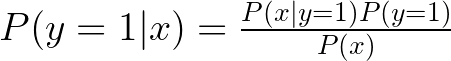
</div>

To find the Likelihood $P(x|y)$ we assume it is gaussian ditributed. i.e The distributions of X given Y=1 and Y=0 follow a gaussian. To fit a gaussian we need to know the Mean, Covariance etc.

The multivariate Gaussian is given by :
<div>
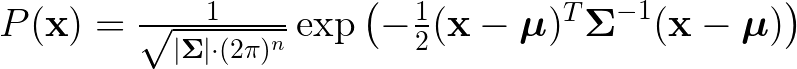
</div>
mu is mean vector and sigma is covariance matrix.

For GDA we deal with 

$y ∼ Bern(\phi)$ \
$x|y = 0 ∼ N(\mu_0,\Sigma)$ \
$x|y = 1 ∼ N(\mu_1,\Sigma)$

*TO WRITE EQUATIONS of distributions*

So the GDA algorithm fits these distributions. By "fitting" we mean that GDA finds values of parameters to maximize the likelihood. In words Given data sample belongs to positive class, we want to maximize the probabilty of the apriori density of features. So during test time, we can use Bayes rule to find the posterior.

The parameters of the model are mu1, mu2, sigma and phi. We do MLE to maximize the joint likelihood. 

*DERIVE MLEs*

Give intuiton for MLEs

In [72]:
# Cheating
def descion_boundary(mu1, covar_a, mu2, covar_c):
    X1, X2 = np.mgrid[-3:3:200j, -3:3:200j]
    x1_ravel = X1.ravel()
    x2_ravel = X2.ravel()
    rav_data = []
    for rav1, rav2 in zip(x1_ravel,x2_ravel):
        rav_data.append([rav1, rav2])


    dif = []
    for every in rav_data:
        p_a = norm_pdf_multivariate(every, np.squeeze(mu1), matrix(covar_a))
        p_c = norm_pdf_multivariate(every, np.squeeze(mu2), matrix(covar_c))
        dif.append([p_a-p_c])

    dif = np.array(dif)
    dif = dif.reshape(X1.shape)

    return X1, X2, dif

def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(-2.1, 2.1, 100)
    yi = np.linspace(-2.1, 2.1, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('griddata test (%d points)' % npts)

Now we have the Max Likelihood Estimates, we can use Bayes Rule and calculate $P(y|x)$
At test time we simplify Bayes Rule to bring it to a Logistic Regression Form and evaluate class probability of new sample p(y|x) 

Once we know the mean and variance for the 2 normal distributions, we can draw the decision boundary seperating the two distributions. To do this we plot 2D Gaussians with corresponding mean and variance of our two distributions. The difference between the gaussians gives the decision boundary. Why?

Another way to plot the decision boundary is writing the likelihood of p(y|x) in a logisitc regression form(CS229) and plotting the parameters of logistic regression model. 

contours describing the density and distribution of data. The contours for ditributions with same mean and variance will be the same. We plot contours of 2D Disribution with same mean and variance, instead of plotting contours of our data distribution as our data has multiple dimensions and will be hard to visualize, but we essentially capture the data distribution as we use the same mean and variance

In [20]:
class GDA(LinearModel):
    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        m, n = x.shape
        self.theta = np.zeros(n+1)

        # Compute phi, mu_0, mu_1, sigma
        y_1 = sum(y == 1)
        phi = y_1 / m
        mu_0 = np.sum(x[y == 0], axis=0) / (m - y_1)
        mu_1 = np.sum(x[y == 1], axis=0) / y_1
        sigma = ((x[y == 0] - mu_0).T.dot(x[y == 0] - mu_0) + (x[y == 1] - mu_1).T.dot(x[y == 1] - mu_1)) / m

        # Compute theta
        sigma_inv = np.linalg.inv(sigma)
        self.theta[0] = 0.5 * (mu_0 + mu_1).dot(sigma_inv).dot(mu_0 - mu_1) - np.log((1 - phi) / phi) # b
        self.theta[1:] = sigma_inv.dot(mu_1 - mu_0) # k
        
        # Return theta
        return mu_0, mu_1, sigma, self.theta

        # *** END CODE HERE ***

    def predict(self, x):
        return 1 / (1 + np.exp(-x.dot(theta[1:] + theta[0])))


In [21]:
# Making prediction for a single sample P(y|x)
gda = GDA()
mu_0, mu_1, sigma, theta = gda.fit(x, y_train)
gda.predict(np.array([-3,-3]))

0.7042825965287949

In [23]:
def plot(x, y, theta_1, legend_1=None, theta_2=None, legend_2=None, title=None, correction=1.0):
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta_1^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', label=legend_1, linewidth=2)

    # Plot decision boundary (found by solving for theta_2^T x = 0)
    if theta_2 is not None:
        x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
        x2 = -(theta_2[0] / theta_1[2] * correction + theta_2[1] / theta_2[2] * x1)
        plt.plot(x1, x2, c='black', label=legend_2, linewidth=2)

    # Add labels, legend and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    if legend_1 is not None or legend_2 is not None:
        plt.legend(loc="upper left")
    if title is not None:
        plt.suptitle(title, fontsize=12)

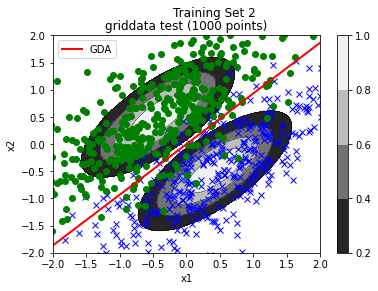

In [28]:
# Blue is Class 1
gda = GDA()
mu_0, mu_1, sigma, theta = gda.fit(x, y_train)
plot(x, y_train, theta_1=gda.theta, legend_1='GDA', theta_2=None, legend_2=None, title='Training Set 2')

seed(1234)
npts = 1000
x0 = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = gauss(x0, y, Sigma=sigma, mu=np.squeeze(mu_0)) # Green - Negative
zz = gauss(x0, y, Sigma=sigma, mu=np.squeeze(mu_1)) #  Blue - Positive
plot_countour(x0, y, z)
plot_countour(x0, y, zz)
plt.colorbar() # draw colorbar


In [428]:
# p(x|y) Given the class, mean, sigma we can find probablity how well the features represent the class.
p_1 = norm_pdf_multivariate([-1, 0], np.squeeze(mu_0), matrix(sigma))  # how probable is it that the data point
p_0 = norm_pdf_multivariate([-1, 0], np.squeeze(mu_1), matrix(sigma))  # comes from these to distributions

# their respective probabilities
print("\nprob of data point[0.8, 0.2] belongs to class Postive:", p_1)
print("\nprob of data point[0.8, 0.2] belongs to class Green:", p_0)



prob of data point[0.8, 0.2] belongs to class Postive: 0.23743223147896658

prob of data point[0.8, 0.2] belongs to class Green: 0.0038685813094760475


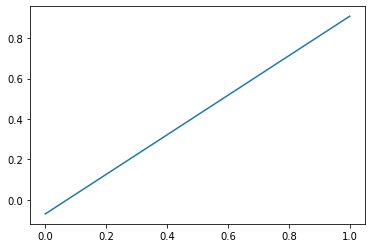

In [39]:
plt.plot(x[1])

In [34]:
x[y==0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 800 but corresponding boolean dimension is 1000

In [31]:
predictions = []
for i in range (len(x)):
    pred = gda.predict(x[i])
    predictions.append(pred)
predictions = np.array(predictions)

In [81]:
x_train

array([[3.7594805 , 7.5079397 ],
       [3.42205706, 4.99120267],
       [2.77881751, 4.11207082],
       ...,
       [3.54410545, 2.64987938],
       [2.57546055, 2.51725473],
       [3.5608151 , 3.99184993]])

In [88]:
x[0]

array([0.23925746, 3.16266004])

In [85]:
dist=[]
for i in x[0:400]:
    dist.append(norm_pdf_multivariate(i, np.squeeze(mu_0), matrix(sigma)))

In [93]:
sigma[0]

array([0.81857318, 0.57150071])

In [96]:
mu_1

array([ 0.42594227, -0.49244061])

In [100]:
mean = np.concatenate([mu_0,mu_1])

Text(0.5, 1.0, 'Plotting P(y=1|x) For all x')

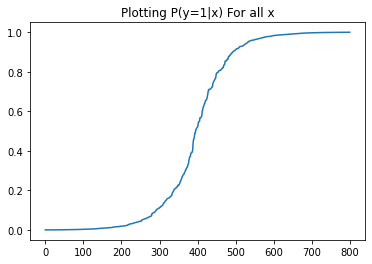

In [64]:
plt.plot(sort(predictions))
plt.title("Plotting P(y=1|x) For all x")

In [73]:
# Evaluates the likelihood or cclass conditional of a sample. Return p(x|y) => Given the Which class it belongs to(given distribution) 
# what do features look like. What is the prob distribution of the features
def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    #print(size)
    assert (size == len(mu) and (size, size) == sigma.shape), "dims of input do not match"
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        assert det!=0, "covariance matrix cannot be singular"

        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = matrix(x - mu)
        inv = sigma.I
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result

def get_true(y):
    true = []
    for i in y:
        if(i==1):
            true.append(1)
        else:
            true.append(0)
    return true

def seperate_data(x, y):
    alaska = []
    canada = []
    for i,val in enumerate(y):
        if(val==1):
            alaska.append(x[i])
        else:
            canada.append(x[i])
    return np.array(alaska), np.array(canada)


def min_max_normalize(x):
    global x1_min, x2_min, x1_max, x2_max
    x1_max = np.max(x[:,0])
    x1_min = np.min(x[:,0])

    x2_max = np.max(x[:,1])
    x2_min = np.min(x[:,1])
    x[:,0] = (x[:,0]-x1_min)/(x1_max-x1_min)
    x[:,1] = (x[:,1]-x2_min)/(x2_max-x2_min)

    return x


def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(-2.1, 2.1, 100)
    yi = np.linspace(-2.1, 2.1, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('griddata test (%d points)' % npts)



In [140]:
# https://peterroelants.github.io/posts/multivariate-normal-primer/

def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

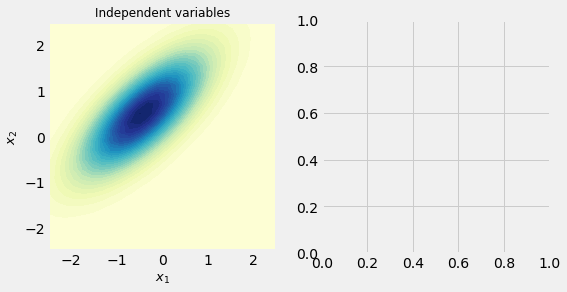

In [132]:
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = mu_1.reshape(2,1)  # Mean
bivariate_covariance = sigma  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)
plt.show()

In [135]:
mean_x = mu_0[0]
mean_y = mu_0[1]
# Get the blocks (single values in this case) from 
#  the covariance matrix
A = sigma[0, 0]
B = sigma[1, 1]
C = sigma[0, 1]  # = C transpose in this case

In [136]:
y_condition = 1.  # To condition on y
mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
cov_xgiveny = A - C * (1/B) * C

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

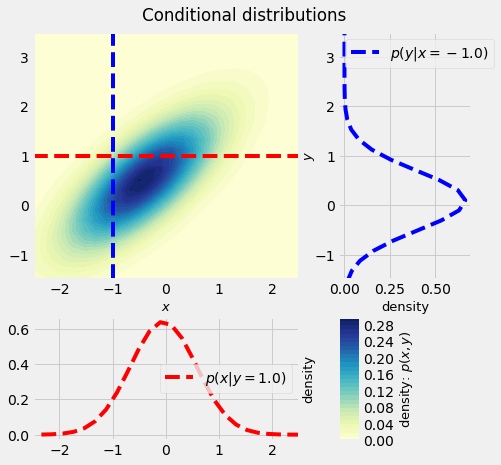

In [142]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])

bivariate_mean = mu_0.reshape(2,1)  # Mean
bivariate_covariance = sigma  # Covariance
x, y, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 33, cmap=cm.YlGnBu)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=50)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, 'b--', 
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=50)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, 'r--', 
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()

In [ ]:
X1, X2 = np.mgrid[-3:3:20j, -3:3:20j]
x1_ravel = X1.ravel()
x2_ravel = X2.ravel()
rav_data = []
for rav1, rav2 in zip(x1_ravel,x2_ravel):
    rav_data.append([rav1, rav2])


dif = []
a = []
b = []
for every in rav_data:
    p_a = norm_pdf_multivariate(every, np.squeeze(mu_0), matrix(sigma))
    p_c = norm_pdf_multivariate(every, np.squeeze(mu_1), matrix(sigma))
    a.append(p_a)
    b.append(p_c)
    dif.append(p_a-p_c)
    

dif = np.array(dif)
dif = dif.reshape(X1.shape)


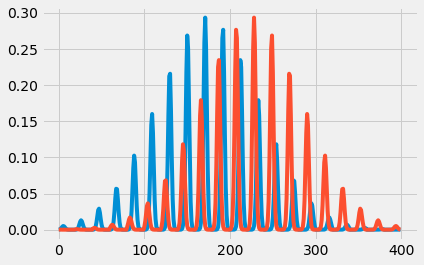

In [105]:
plt.figure()
plt.plot(a)
plt.plot(b)
plt.show()